In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
filename = str(input("Enter the file name of the dataset : "))
dataset = pd.read_csv(filename)

Enter the file name of the dataset : churn_data.csv


In [3]:
dataset.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
#Missing values

missing_values = dataset.isna().sum()
print("No. of missing values is : \n", missing_values)
#Rows where there are missing values
print("\n", dataset[dataset.isna().any(axis = 1)])

#Specific to this dataset
dataset['TotalCharges'] = pd.to_numeric(dataset.TotalCharges, errors = 'coerce')
dataset.dtypes

#Invalid values - after filling in missing values and converting 
invalid_values = dataset.isnull().sum()
print("The number of invalid data values is : ", invalid_values)
#The rows where the condition is true
print("\n", dataset[dataset.isna().any(axis = 1)])

numeric_columns = list(dataset.select_dtypes(include=['int64','float64']))

#Missing value function - need to find a dataset with missing values and create this function
def missing_function(dataset, user_input) :
    #print("Your choice : ", user_input)
    if (user_input == 1) :
        dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())
    elif (user_input == 2) :
        dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].median())
    elif (user_input == 3) :
        dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mode())
    elif (user_input == 4) :
        dataset[numeric_columns] = dataset[numeric_columns].dropna()
        
    print("\n", dataset.isna().sum())    

No. of missing values is : 
 customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Empty DataFrame
Columns: [customerID, tenure, PhoneService, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
The number of invalid data values is :  customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

       customerID  tenure PhoneService  Contract PaperlessBilling  \
488   4472-LVYGI       0           No  Two year              Yes   
753   3115-CZMZD       0          Yes  Two year               No   
936   5709-LVOEQ       0          Yes  Two year               No   
1082  4367-NUYAO       0          Yes  Two year               No   
1340  

In [19]:
print("\n\nHow do you want to treat the missing values?")
print('''1. Fill with mean
2. Fill with median
3. Fill with mode
4. Drop''')
user_input = int(input("Enter your choice : "))
missing_function(dataset, user_input)

def outlier_treatment(x, user_input2) :
    index = len(x)
    for i in range(0, index) :
        if ((x[i] <= Q1) | (x[i] >= Q3)):
            print("{} is an outlier \n".format(x[i]))
            if (user_input2 == 1): 
                    x[i] = col_name.mean
            if (user_input2 == 2) :
                    if x[i] > Q3:
                        x[i] = Q3
                    elif x[i] < Q1:
                        x[i] = Q1
            print("{}".format(x[i]))
            #Later on add median and random sampling as well.



How do you want to treat the missing values?
1. Fill with mean
2. Fill with median
3. Fill with mode
4. Drop
Enter your choice : 1

 customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



Column name :  tenure
The median is : 29.0
The modes are :  0    1
dtype: int64
The variance is :  603.0931340961827
count    7042.000000
mean       32.366373
std        24.557955
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
25% : 9.0
75% : 55.0
The IQR is :  46.0
The number of missing values is : 0
The total number of outliers in this column is : 0
AxesSubplot(0.125,0.125;0.775x0.755)

Column name :  MonthlyCharges
The median is : 70.35
The modes are :  0    20.05
dtype: float64
The variance is :  905.3020463741851
count    7042.000000
mean       64.755886
std        30.088238
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
25% : 35.5
75% : 89.85
The IQR is :  54.349999999999994
The number of missing values is : 0
The total number of outliers in this column is : 0
AxesSubplot(0.125,0.125;0.775x0.755)

Co

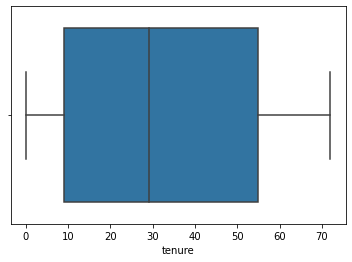

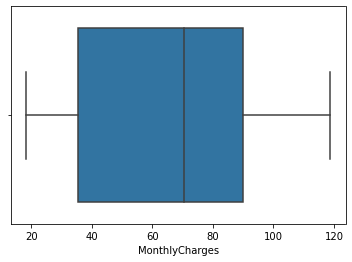

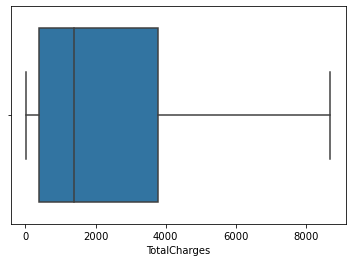

In [20]:
#EDA - this should loop for every numerical column
for i in numeric_columns :
    col_name = dataset[i]
    print("\nColumn name : ", col_name.name)
    print("The median is :", col_name.describe().loc['50%'])
    print("The modes are : ", col_name.mode())
    std = col_name.std()
    print("The variance is : ", (std ** 2))
#print("The number of invalid data is :")
    print(col_name.describe(exclude = [object]))
# Only modes, variance and missing values aren't covered by .dsecribe(). IQR range is shown.
    q25 = col_name.describe(include = 'all').loc ['25%']
    q75 = col_name.describe(include = 'all').loc['75%']
#include = 'all' for this answer, but you can also supply a list of dtypes
    print("25% :", q25)
    print("75% :", q75)
    IQR = q75 - q25
    print("The IQR is : ", IQR)
    print("The number of missing values is :", col_name.isnull().sum())
    #For this case, let's do IQR. But I also want to implement the auto/unsupervised methods.
    Q1 = q25 - (1.5*IQR) #Anything lower than this
    Q3 = q75 + (1.5*IQR) #Anything higher than this
    outlier_sum = 0
    def outlier(x):
        outlier_sum = 0
        for i in x :
            if ((i <= Q1) | (i >= Q3)):
                print("{} is an outlier \n".format(i))
                outlier_sum += 1
    outlier(col_name)    
    print("The total number of outliers in this column is : {}".format(outlier_sum))
    plt.figure()
    print(sns.boxplot(col_name)) 
#
print("\n\n")
print('''How do you want to treat the outliers?
1. Mean sampling
2. Trimming''')
user_input2 = int(input("Enter your choice : "))
for i in numeric_columns :
    col_name = dataset[i]
    outlier_treatment(col_name, user_input2)
print("Outlier treatment done.")    

In [21]:
#To determine feature selection, we need to convert last row(churn) into machine-readable form
target_variable = dataset.iloc[:,-1]
target_variable = target_variable.astype('category')
target_variable = target_variable.cat.codes
print(target_variable)
#ideally, we'd be getting this as user input
training_data = dataset.iloc[:,:-1]

0       0
1       0
2       1
3       0
4       1
       ..
7037    0
7038    0
7039    0
7040    0
7041    1
Length: 7042, dtype: int8


In [22]:
training_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
#Visualization
print(sns.pairplot(data = dataset))
for i in numeric_columns :
    col_name = dataset[i]
    plt.figure()
    print(sns.distplot(col_name))
    plt.figure()
    #plt.scatter(dataset[col_name], dataset['TotalCharges]
    #Other multivariate plots?
plt.figure()
print(sns.catplot(data = dataset)) 

#Scatterplot
temp_var = len(numeric_columns)
for i in range(0, temp_var):
    col_name = numeric_columns[i]
    #print("\n", col_name)
    for j in range(1, temp_var):
        next_col = numeric_columns[j]
        plt.scatter(dataset[col_name], dataset[next_col])
        plt.xlabel(col_name)
        plt.ylabel(next_col)
        plt.figure()

for i in range(0, temp_var):
    col_name = numeric_columns[i]
    #print("\n", col_name)
    for j in range(0, temp_var):
        next_col = numeric_columns[j]
        sns.relplot(data = dataset, x = col_name, y = next_col, hue = 'Churn') #Hue = target_variable


Correlation for the column :  tenure
tenure            1.000000
TotalCharges      0.824714
MonthlyCharges    0.247701
Name: tenure, dtype: float64

Correlation for the column :  MonthlyCharges
MonthlyCharges    1.000000
TotalCharges      0.650352
tenure            0.247701
Name: MonthlyCharges, dtype: float64

Correlation for the column :  TotalCharges
TotalCharges      1.000000
tenure            0.824714
MonthlyCharges    0.650352
Name: TotalCharges, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017167D530D0>,
      dtype=object)

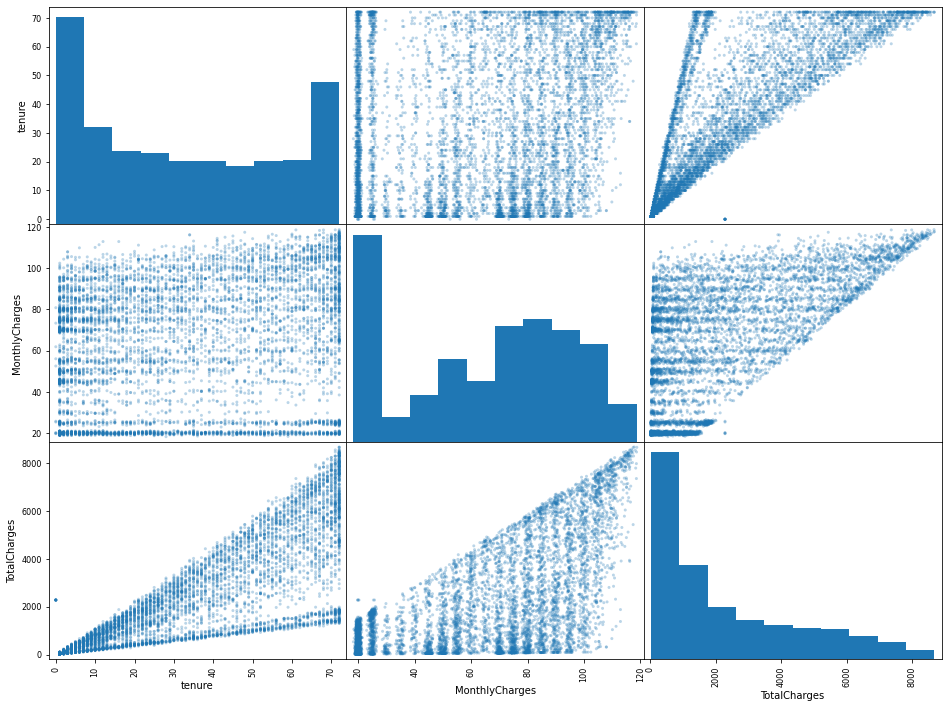

In [23]:
##Correlation
dataset.corr()
temp_var = len(numeric_columns)
for i in range(0, temp_var):
    col_name = numeric_columns[i]
    print("\nCorrelation for the column : ", col_name)
    print(dataset.corr()[col_name].sort_values(ascending = False))

from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (16,12), alpha = 0.3) #Could also plot using sns heatmap 

In [12]:
training_data.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [24]:
train_data_colnames = training_data.columns.tolist()
print(train_data_colnames)

['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [25]:
training_data.nunique()

customerID          7042
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
dtype: int64

In [26]:
for col_name in train_data_colnames :
    print(training_data[col_name].dtype)
    print(training_data[col_name].nunique())

object
7042
int64
73
object
2
object
3
object
2
object
4
float64
1585
float64
6530


In [27]:
#Automating this:
#if dtype - object & nunique - < 1000(arbitrarily selected), convert to categorical
#if dtype - object & nunique - > 1000, drop
for col_name in train_data_colnames :
    if training_data[col_name].dtype == 'object' :
        if (training_data[col_name].nunique() < 1000) :
            training_data[col_name] = training_data[col_name].astype('category')
            training_data[col_name] = training_data[col_name].cat.codes
        else :
            training_data.drop(axis = 1, columns = col_name, inplace = True)

In [28]:
training_data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,2,29.85,29.85
1,34,1,1,0,3,56.95,1889.50
2,2,1,0,1,3,53.85,108.15
3,45,0,1,0,0,42.30,1840.75
4,2,1,0,1,2,70.70,151.65


In [16]:
training_data.dtypes

tenure                int64
PhoneService           int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [29]:
##Forward selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state = 0)

# Build step forward feature selection
sfs_model = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs_model.fit(training_data, target_variable)

# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   16.9s finished

[2021-01-04 10:16:16] Features: 1/5 -- score: 0.7517766267178527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.4s finished

[2021-01-04 10:16:26] Features: 2/5 -- score: 0.7662601216207496[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.1s finished

[2021-01-04 10:16:36] Features: 3/5 -- score: 0.7621411058777985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

[0, 2, 3, 5, 6]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s finished

[2021-01-04 10:16:50] Features: 5/5 -- score: 0.7696668938318602

In [30]:
#df[feat_cols] -> selected features
train_sel_feat = training_data.iloc[:, feat_cols]

In [31]:
##Model training
##Getting split ratio and splitting the training set and test set
split_ratio = np.empty(2, dtype = int)
split_ratio[0] = int(input("Enter the split ratio (train followed by test): \n"))
split_ratio[1] = int(input(" : "))
split_ratio = (split_ratio[1]/100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_sel_feat, target_variable, test_size = split_ratio, random_state = 0)
print("Set successfully split with a ratio of {} of entire dataset to test" .format(split_ratio))

Enter the split ratio (train followed by test): 
80
 : 20
Set successfully split with a ratio of 0.2 of entire dataset to test


In [32]:
train_sel_feat.tail()

,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
7037,72,2,1,21.15,1419.40
7038,24,1,1,84.80,1990.50
7039,72,1,1,103.20,7362.90
7040,11,0,1,29.60,346.45
7041,4,0,1,74.40,306.60


In [33]:
train_sel_feat.shape

(7042, 5)

In [21]:
target_variable.tail()

7037    0
7038    0
7039    0
7040    0
7041    1
dtype: int8

In [35]:
target_variable.shape

(7042,)

In [ ]:
#Classification - if target variable.dtype == 'object'
#Regression - if target variable.dtype == 'int'/'float'

In [35]:
#Encoding function
#OneHotEncoder - unordered features
#Ordinal - ordered features
#Label - labels
sel_cat_feats = X_train.select_dtypes(include = 'object')
test_cat_feats = X_test.select_dtypes(include = 'object')
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
#column_trans = make_column_transformer((OneHotEncoder(), []), remainder = 'passthrough')
#sel_cat_feats = column_trans.fit_transform(sel_cat_feats)
#test_cat_feats = column_trans.transform(test_cat_feats)
#Can't pass entire dataframe to OneHotEncoder, so I'll use pandas - get_dummies instead(trying to automate)
train_dataset_dummies = pd.get_dummies(sel_cat_feats, drop_first = True)
test_dataset_dummies = pd.get_dummies(test_cat_feats, drop_first = True)

ValueError: No objects to concatenate

In [ ]:
#Oh wait, you won't get any object datatypes in this program. They're all already converted to categorical codes.
#I'll write the code for pandas get_dummies anyway.

In [37]:
#Scaling function
#Why are we encoding numerical data? Shouldn't it be scaled?
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sel_numeric_feats = X_train.select_dtypes('number')
test_numeric_feats = X_test.select_dtypes('number')
sel_numeric_feats = sc.fit_transform(sel_numeric_feats)
test_numeric_feats = sc.transform(test_numeric_feats)

In [ ]:
model_type = str(input("Classification or Regression? : "))

In [ ]:
if (model_type == "Classification") :
    print(" Choose a method :\n ")
    print('''    1. Logistic Regression
    2. K-Nearest Neighbors
    3. Support Vector Model(Linear)
    4. Naive Bayes
    5. Decision Tree Classification
    6. Random Forest Classification''')
    choice = int(input(":"))
    
    #Encoding for categorical, scaling for numerical
    
    #No need for them to choose what method. Let's just run 'em all, display the scores, and choose the best one/
    #take an input then

In [ ]:
if (model_type == "Regression") :
    print("You've chosen Regression")
    print(" Choose a method :\n ")
    print('''    1. Linear Regression
    2. Polynomial Regression
    3. Support Vector Regression
    4. Decision Tree Regression
    5. Random Forest Regression''')
    choice = int(input(":"))

In [32]:
#Regression - not as function
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
lin_reg_pred = Linear_reg.predict(X_test)
print("Linear Regression predicted values :", lin_reg_pred)
Poly_feat = PolynomialFeatures(degree = 4) #No. of degrees of polynomial regression - 4, change here if necessary
#Make this a function
X_Poly = Poly_feat.fit_transform(X_train)
poly_reg = Linear_reg.fit(X_Poly, y_train)
X_Poly_test = Poly_feat.transform(X_test)
poly_reg_test = Linear_reg.predict(X_Poly_test)
print("Polynomial Regression predicted values : ", poly_reg_test)
#SVR
SVM_reg = SVR(kernel = 'rbf') #Kernel can be changed
SVM_reg.fit(X_train, y_train)
SVM_reg_pred = SVM_reg.predict(X_test)
print("SVM predicted values :", SVM_reg_pred)
#Decision Tree
decision_tree_reg = DecisionTreeRegressor(random_state = 0)
decision_tree_reg.fit(X_train, y_train)
decision_tree_pred = decision_tree_reg.predict(X_test)
print("Decision Tree Regression predicted values :", decision_tree_pred)
#Random Forest
random_forest_reg = RandomForestRegressor(random_state = 0)
random_forest_reg.fit(X_train, y_train)
random_forest_pred = random_forest_reg.predict(X_test)
print("Random Forest predicted values :", random_forest_pred)

Linear Regression predicted values : [ 0.02617644 -0.04933992  0.34575104 ...  0.19940806  0.54888053
  0.33066825]
Polynomial Regression predicted values :  [ 0.0315291  -0.01855055  0.45693003 ...  0.1057041   0.57015104
  0.38977903]
SVM predicted values : [0.03155262 0.09727455 0.17759303 ... 0.07697086 0.2163848  0.09943182]
Decision Tree Regression predicted values : [0. 0. 1. ... 0. 1. 0.]
Random Forest predicted values : [0.01 0.   0.69 ... 0.   0.7  0.06]


In [50]:
#Regression as a function
def regression_function():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    
    reg_models = []
    
    Linear_reg = LinearRegression()
    Linear_reg.fit(X_train, y_train)
    Linear_reg_poly = LinearRegression() # For polynomial regression
    reg_models.append(("Linear Regression", Linear_reg.predict(X_test)))
    SVM_reg = SVR(kernel = 'rbf') #Kernel can be changed
    SVM_reg.fit(X_train, y_train)
    reg_models.append((("SVR"), SVM_reg.predict(X_test)))
    decision_tree_reg = DecisionTreeRegressor(random_state = 0)
    decision_tree_reg.fit(X_train, y_train)
    reg_models.append((("Decision Tree"), decision_tree_reg.predict(X_test)))
    random_forest_reg = RandomForestRegressor(random_state = 0)
    random_forest_reg.fit(X_train, y_train)
    random_forest_pred = random_forest_reg.predict(X_test)
    reg_models.append((("Random Forest"), random_forest_reg.predict(X_test)))
    poly_feat = PolynomialFeatures(degree = 4) # Change no. of features of poly_reg here
    X_poly = poly_feat.fit_transform(X_train)
    poly_reg = Linear_reg_poly.fit(X_poly, y_train)
    X_poly_test = poly_feat.transform(X_train)
    poly_reg_test = Linear_reg_poly.predict(X_poly_test)
    reg_models.append((("Polynomial Regression"), poly_reg_test))
    #y_test = y_test.reshape(len(y_test),1)
    
    reg_results = []
    filename = 'regression_models.sav'
    pickle.dump(reg_models, open(filename, 'wb'))
    
    for name, pred in reg_models :
        print("\n Predicted result via model", name)
        print("Is :", pred)
        pred_results = pred.reshape(len(pred),1)
        #comparison = np.concatenate((pred_results, y_test))
        reg_results.append((name, pred_results))

    return reg_results

In [57]:
import pickle
filename = 'regression_models.sav'
reg_models = pickle.load(open(filename, 'rb'))
for name, pred in reg_models :
        print("\n Predicted result via model", name)
        print("Is :", pred)
        pred_results = pred.reshape(len(pred),1)


 Predicted result via model Linear Regression
Is : [ 0.02617644 -0.04933992  0.34575104 ...  0.19940806  0.54888053
  0.33066825]

 Predicted result via model SVR
Is : [0.03155262 0.09727455 0.17759303 ... 0.07697086 0.2163848  0.09943182]

 Predicted result via model Decision Tree
Is : [0. 0. 1. ... 0. 1. 0.]

 Predicted result via model Random Forest
Is : [0.01 0.   0.69 ... 0.   0.7  0.06]

 Predicted result via model Polynomial Regression
Is : [0.05838696 0.592785   0.18463367 ... 0.00856432 0.72782977 0.22392743]


In [55]:
regression_results = regression_function()


 Predicted result via model Linear Regression
Is : [ 0.02617644 -0.04933992  0.34575104 ...  0.19940806  0.54888053
  0.33066825]

 Predicted result via model SVR
Is : [0.03155262 0.09727455 0.17759303 ... 0.07697086 0.2163848  0.09943182]

 Predicted result via model Decision Tree
Is : [0. 0. 1. ... 0. 1. 0.]

 Predicted result via model Random Forest
Is : [0.01 0.   0.69 ... 0.   0.7  0.06]

 Predicted result via model Polynomial Regression
Is : [0.05838696 0.592785   0.18463367 ... 0.00856432 0.72782977 0.22392743]


In [98]:
regression_results

[('Linear Regression',
  array([[ 0.02617644],
         [-0.04933992],
         [ 0.34575104],
         ...,
         [ 0.19940806],
         [ 0.54888053],
         [ 0.33066825]])),
 ('SVR',
  array([[0.03155262],
         [0.09727455],
         [0.17759303],
         ...,
         [0.07697086],
         [0.2163848 ],
         [0.09943182]])),
 ('Decision Tree',
  array([[0.],
         [0.],
         [1.],
         ...,
         [0.],
         [1.],
         [0.]])),
 ('Random Forest',
  array([[0.01],
         [0.  ],
         [0.69],
         ...,
         [0.  ],
         [0.7 ],
         [0.06]])),
 ('Polynomial Regression',
  array([[0.05878042],
         [0.59271994],
         [0.17841751],
         ...,
         [0.00565453],
         [0.71399836],
         [0.2065283 ]]))]

In [99]:
y_pred = []
for name, pred in results :
    y_pred = results[1]
    compared = np.concatenate(y_pred, y_test)
    print("Compared : ", compared)

TypeError: 'Series' object cannot be interpreted as an integer

In [23]:
train_sel_feat.tail()

,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
7037,72,2,1,21.15,1419.40
7038,24,1,1,84.80,1990.50
7039,72,1,1,103.20,7362.90
7040,11,0,1,29.60,346.45
7041,4,0,1,74.40,306.60


In [43]:
regression_function()

TypeError: __init__() got an unexpected keyword argument 'deg'

In [58]:
#Classification - function
def classification_function() :
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score

    models = []

    models.append(("Logistic Regression", LogisticRegression()))
    models.append(("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors = 5))) #Change no. of neighbors if you need to
    models.append(("SVC", SVC(kernel = 'linear', random_state = 0))) #Kernel type can be changed, note - SVC takes a while to process
    models.append(("Naive Bayes", GaussianNB())) 
    models.append(("Decision Tree Classification", DecisionTreeClassifier(criterion = 'entropy', random_state = 0))) 
    models.append(("Random Forest Classifier", RandomForestClassifier(n_estimators = 10, random_state = 0)))              
              
    #print(models)              
    model_names = []
    model_results = []
    
    for name, model in models :
        model.fit(sel_numeric_feats, y_train)
        result = cross_val_score(model, test_numeric_feats, y_test,  cv=3)
        print("\n", name)
        print(result)
        model_names.append(name)
        model_results.append(result)
        
    filename = 'classification_models.sav'    
    pickle.dump(models, open(filename,'wb'))    
    return model_names, model_results        

In [59]:
classification_models = classification_function()


 Logistic Regression
[0.77234043 0.78085106 0.78678038]

 K-Nearest Neighbors
[0.7787234  0.77446809 0.75479744]

 SVC
[0.77021277 0.7787234  0.76759062]

 Naive Bayes
[0.75106383 0.73617021 0.67377399]

 Decision Tree Classification
[0.72553191 0.72553191 0.71002132]

 Random Forest Classifier
[0.76170213 0.76382979 0.75053305]


In [63]:
filename = 'classification_models.sav'
class_models = pickle.load(open(filename, 'rb'))
class_models #Trained models
from sklearn.model_selection import cross_val_score
for name, model in class_models :
        result = cross_val_score(model, test_numeric_feats, y_test,  cv=3)
        print("\n", name)
        print(result)


 Logistic Regression
[0.77234043 0.78085106 0.78678038]

 K-Nearest Neighbors
[0.7787234  0.77446809 0.75479744]

 SVC
[0.77021277 0.7787234  0.76759062]

 Naive Bayes
[0.75106383 0.73617021 0.67377399]

 Decision Tree Classification
[0.72553191 0.72553191 0.71002132]

 Random Forest Classifier
[0.76170213 0.76382979 0.75053305]


In [40]:
classification_models

(['Logistic Regression',
  'K-Nearest Neighbors',
  'SVC',
  'Naive Bayes',
  'Decision Tree Classification',
  'Random Forest Classifier'],
 [array([0.77234043, 0.78085106, 0.78678038]),
  array([0.7787234 , 0.77446809, 0.75479744]),
  array([0.77021277, 0.7787234 , 0.76759062]),
  array([0.75106383, 0.73617021, 0.67377399]),
  array([0.72553191, 0.72553191, 0.71002132]),
  array([0.76170213, 0.76382979, 0.75053305])])